In [1]:
%run "Parameter_Estimation.ipynb" #allowing access to parameters

Filtering Database


100%|██████████| 549/549 [01:00<00:00,  9.04it/s]


221 remaining out of 290
normalising and preproccessing signals using DWT


100%|██████████| 221/221 [00:01<00:00, 142.20it/s]


6
Calculating Time Domain Features
Calculating Frequency Domain Features
Calculating Non-Linear Domain Features


In [125]:
import matplotlib.pyplot as plt
import numpy as np


In [122]:
def plot_violin(data, health_state, nan_indices, y_label):
    all_healthy_data = []
    all_unhealthy_data = []
    
    for j in range(6):
        healthy_data = []
        unhealthy_data = []
        for i, state in enumerate(health_state[nan_indices[j]]):
            if state == 'Healthy':
                healthy_data.append(data[j][i])
            elif state == 'Unhealthy':
                unhealthy_data.append(data[j][i])
        all_healthy_data.append(healthy_data)
        all_unhealthy_data.append(unhealthy_data)

    fig, ax = plt.subplots(figsize=(18, 7))

    v1 = ax.violinplot(all_healthy_data, showmeans=True, showextrema=False, showmedians=False,
                   side="low")  
    v2 = ax.violinplot(all_unhealthy_data, showmeans=True, showextrema=False, showmedians=False,
                   side="high") 
    
    for pc in v1['bodies']:
        pc.set_alpha(0.8)
        pc.set_color('#4daf4a')
        pc.set_edgecolor('black')
        

    for pc in v2['bodies']:
        pc.set_alpha(0.8)
        pc.set_color('#e41a1c')
        pc.set_edgecolor('black')

    v1['cmeans'].set_color('black')
    v2['cmeans'].set_color('black')


    ax.legend([v1['bodies'][0],v2['bodies'][0], v1['cmeans']],['Healthy', 'Unhealthy', 'Mean'])

    labels = ['v1', 'v2', 'v3', 'v4', 'v5', 'v6']

    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Channel')
    ax.set_ylabel(y_label)
    ax.set_title(f'Violin Plots for Power Ratio')
    plt.rcParams.update({'font.size': 18})

    plt.show()

    return None

In [123]:
print(params.keys())

dict_keys(['RR mean', 'RR std', 'RR amps', 'RMSSD', 'pNN50', 'mean', 'std', 'skews', 'kurtosis', 'hf', 'lf', 'power ratio', 'total power', 'shannon en', 'sd ratio', 'sd1', 'sd2', 'age'])


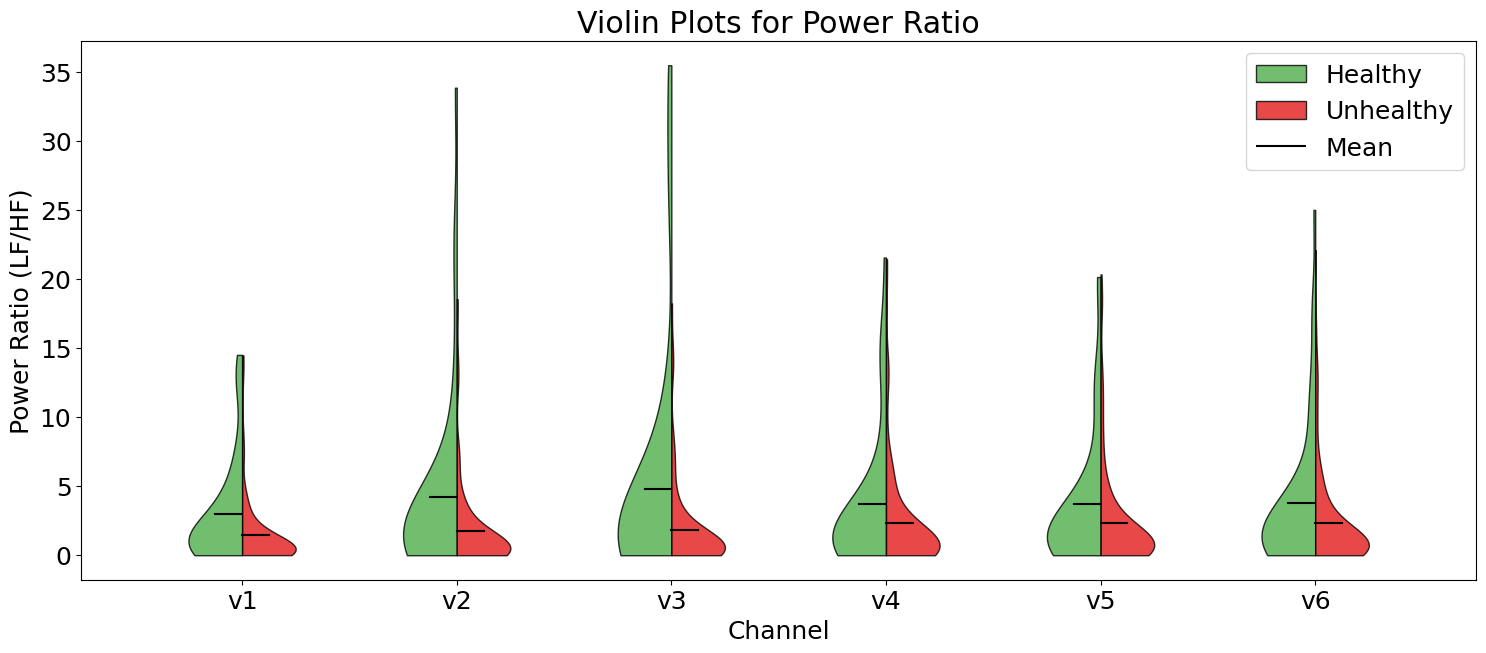

In [124]:
plot_violin(params['power ratio'], health_state, nan_indices, 'Power Ratio (LF/HF)')